1. Import Data & Python Packages

In [19]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
#import matplotlib.pyplot as plt 
#plt.rc("font", size=14) #dictionary objects

import matplotlib as mpl
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

In [3]:
# Read CSV data file into DataFrame
log_df = pd.read_csv("data_source\log2.csv")

# preview train data
log_df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [3]:
# check missing values in train data
log_df.isnull().sum()

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Action                  0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
dtype: int64

In [4]:
log_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


2. Exploratory Data Analysis

In [5]:
log_df.describe(include = 'all')

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,65532,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
unique,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,allow,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,37640,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49391.969343,10577.385812,19282.972761,2671.049930,NaN,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,NaN,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,NaN,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,NaN,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,NaN,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,NaN,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000


<AxesSubplot:xlabel='Elapsed Time (sec)', ylabel='Count'>

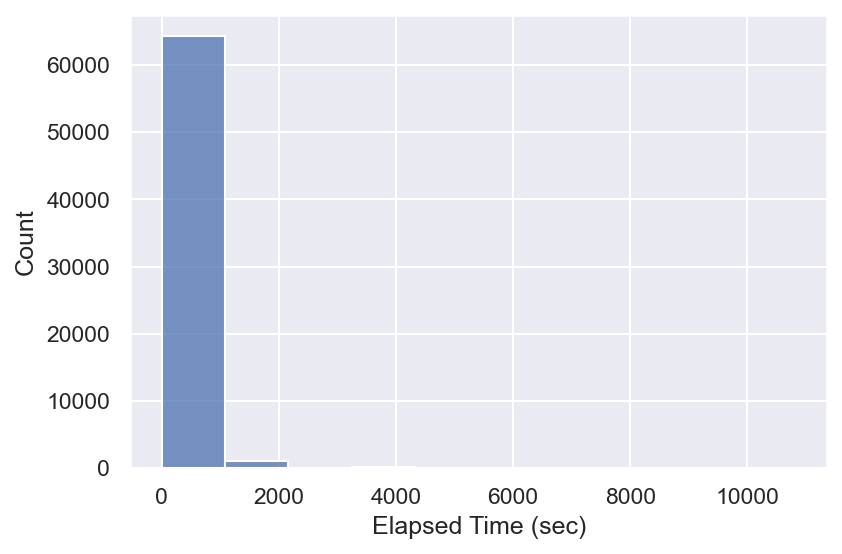

In [10]:
sns.set(rc={'figure.dpi':150})
sns.histplot(data=log_df, x="Elapsed Time (sec)", bins=10)


<AxesSubplot:xlabel='Packets', ylabel='Count'>

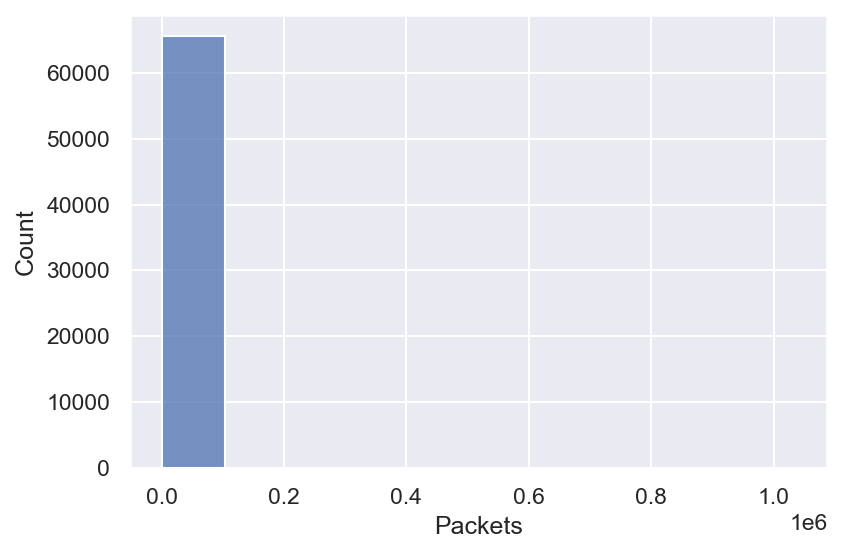

In [11]:
sns.set(rc={'figure.dpi':150})
sns.histplot(data=log_df, x="Packets", bins=10)

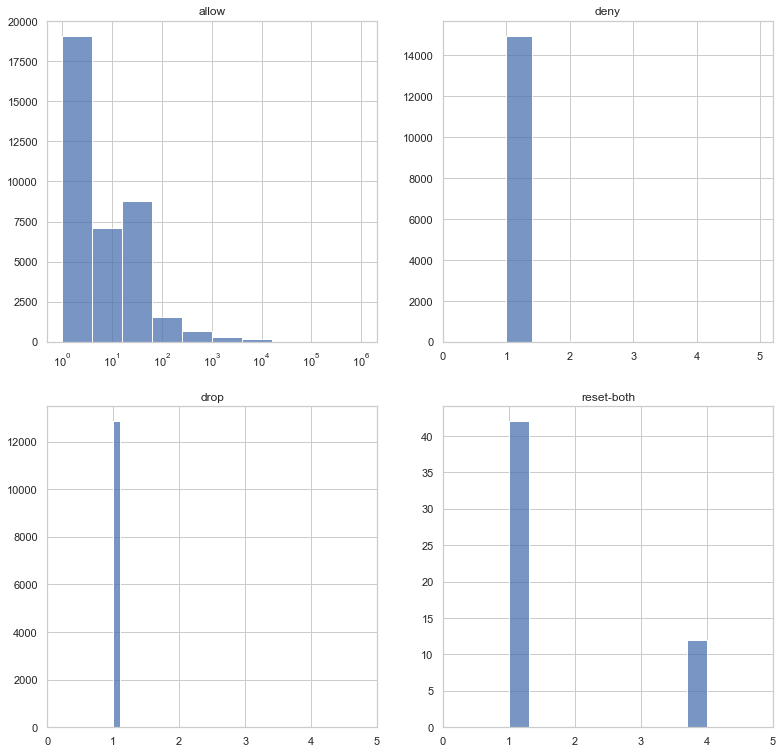

In [30]:
#Setup subplot
fig, ((axes1,axes2),(axes3,axes4)) = plt.subplots(2, 2, figsize=(13, 13))

#Action allow packets
sns.histplot(data=log_df.loc[log_df['Action']=='allow',(['Action','Packets'])], 
            x="Packets", bins=10, ax=axes1, log_scale=True).set(xlabel=None,ylabel=None,title='allow')

sns.histplot(data=log_df.loc[log_df['Action']=='deny',(['Action','Packets'])], 
            x="Packets", bins=10, ax=axes2).set(xlabel=None,ylabel=None,title='deny')

sns.histplot(data=log_df.loc[log_df['Action']=='drop',(['Action','Packets'])], 
            x="Packets", bins=10, ax=axes3).set(xlabel=None,ylabel=None,title='drop')

sns.histplot(data=log_df.loc[log_df['Action']=='reset-both',(['Action','Packets'])], 
            x="Packets", bins=10, ax=axes4).set(xlabel=None,ylabel=None,title='reset-both')

axes2.set_xticks(np.arange(0, 6,1))
axes3.set_xticks(np.arange(0, 6,1))
axes4.set_xticks(np.arange(0, 6,1))

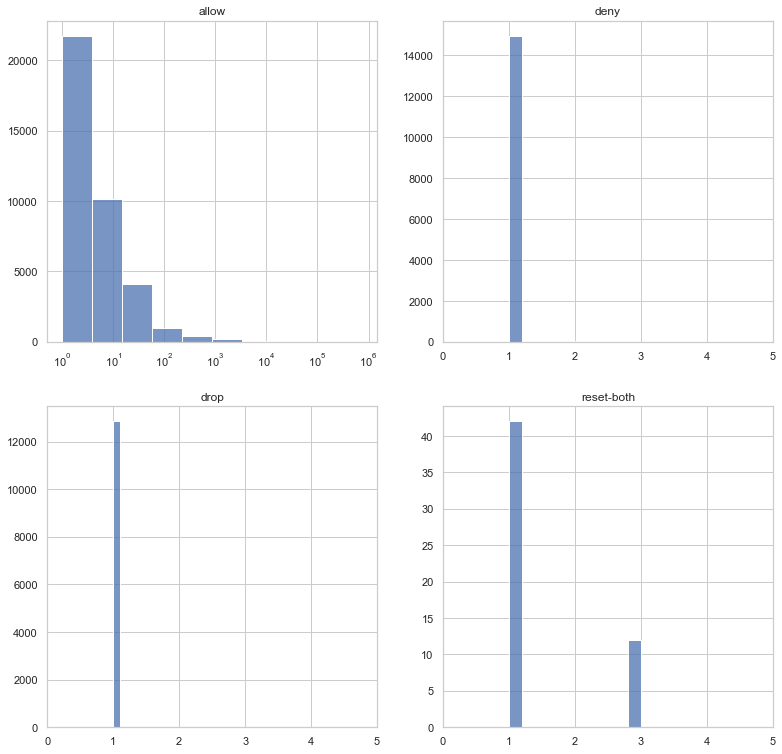

In [29]:
#Setup subplot
fig, ((axes1,axes2),(axes3,axes4)) = plt.subplots(2, 2, figsize=(13, 13))

#Action allow packets
sns.histplot(data=log_df.loc[log_df['Action']=='allow',(['Action','pkts_sent'])], 
            x="pkts_sent", bins=10, ax=axes1, log_scale=True).set(xlabel=None,ylabel=None,title='allow')

sns.histplot(data=log_df.loc[log_df['Action']=='deny',(['Action','pkts_sent'])], 
            x="pkts_sent", bins=10, ax=axes2).set(xlabel=None,ylabel=None,title='deny')

sns.histplot(data=log_df.loc[log_df['Action']=='drop',(['Action','pkts_sent'])], 
            x="pkts_sent", bins=10, ax=axes3).set(xlabel=None,ylabel=None,title='drop')

sns.histplot(data=log_df.loc[log_df['Action']=='reset-both',(['Action','pkts_sent'])], 
            x="pkts_sent", bins=10, ax=axes4).set(xlabel=None,ylabel=None,title='reset-both')

axes2.set_xticks(np.arange(0, 6,1))
axes3.set_xticks(np.arange(0, 6,1))
axes4.set_xticks(np.arange(0, 6,1))